In [190]:
#loading the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as sm
import re


### Population Data

In [191]:
#loading the population data
df = pd.read_csv('Kenya.csv')
df.head()

,name,num_code,year,age,sex,population
0,Kenya,404,2015,15,female,341486.56
1,Kenya,404,2015,15,male,344435.68
2,Kenya,404,2015,16,female,499980.48
3,Kenya,404,2015,16,male,504210.88
4,Kenya,404,2015,17,female,598556.48


In [192]:
# Filter data for ages 15 to 35
filtered_df = df[(df["age"] >= 15) & (df["age"] <= 35)]

# Define age groups
age_groups = pd.cut(filtered_df["age"], bins=[15, 25, 36], labels=["15-24", "25-35"])

# Add age group column to DataFrame
filtered_df["age_group"] = age_groups

# Group and aggregate population by year, age group, and sex
grouped_df = filtered_df.groupby(["year", "age_group", "sex"])["population"].sum().reset_index()

print(grouped_df)


     year age_group     sex   population
0    2015     15-24  female  4818104.640
1    2015     15-24    male  4840215.200
2    2015     25-35  female  3705181.440
3    2015     25-35    male  3669375.040
4    2016     15-24  female  4962468.832
..    ...       ...     ...          ...
99   2039     25-35    male  6319410.400
100  2040     15-24  female  7511131.840
101  2040     15-24    male  7602708.640
102  2040     25-35  female  6425941.120
103  2040     25-35    male  6429023.040

[104 rows x 4 columns]


In [193]:
# Extracting popln data for the year 2015-2024
# Use .loc to filter population data for the years 2015 to 2024
popln = grouped_df.loc[(grouped_df["year"] >= 2015) & (grouped_df["year"] <= 2024)]

print(popln)

    year age_group     sex   population
0   2015     15-24  female  4818104.640
1   2015     15-24    male  4840215.200
2   2015     25-35  female  3705181.440
3   2015     25-35    male  3669375.040
4   2016     15-24  female  4962468.832
5   2016     15-24    male  4986519.680
6   2016     25-35  female  3778345.472
7   2016     25-35    male  3742889.280
8   2017     15-24  female  5106833.024
9   2017     15-24    male  5132824.160
10  2017     25-35  female  3851509.504
11  2017     25-35    male  3816403.520
12  2018     15-24  female  5251197.216
13  2018     15-24    male  5279128.640
14  2018     25-35  female  3924673.536
15  2018     25-35    male  3889917.760
16  2019     15-24  female  5395561.408
17  2019     15-24    male  5425433.120
18  2019     25-35  female  3997837.568
19  2019     25-35    male  3963432.000
20  2020     15-24  female  5539925.600
21  2020     15-24    male  5571737.600
22  2020     25-35  female  4071001.600
23  2020     25-35    male  4036946.240


### Inactivity Rate

In [194]:
# Loading the inactivity rate by sex and age dataset
df1=pd.read_csv('Inactivity_rate.csv')
df1.head()


,indicator.label,sex.label,classif1.label,time,obs_value
0,Inactivity rate by sex and age -- ILO modelled...,Sex: Male,"Age (Youth, adults): 15-24",2024,57.193
1,Inactivity rate by sex and age -- ILO modelled...,Sex: Male,"Age (Youth, adults): 25+",2024,6.661
2,Inactivity rate by sex and age -- ILO modelled...,Sex: Female,"Age (Youth, adults): 15-24",2024,58.297
3,Inactivity rate by sex and age -- ILO modelled...,Sex: Female,"Age (Youth, adults): 25+",2024,11.648
4,Inactivity rate by sex and age -- ILO modelled...,Sex: Male,"Age (Youth, adults): 15-24",2023,57.228


In [195]:
# Use .loc to filter inactivity data for the years 2015 to 2024
filtered_df = df1.loc[df1["time"].between(2015, 2024)]
# Define mappings for classif1.label and sex.label
classif1_mapping = {
    "Age (Youth, adults): 15-24": "15-24",
    "Age (Youth, adults): 25+": "25+"
}

sex_mapping = {
    "Sex: Female": "female",
    "Sex: Male": "male"
}

# Apply mappings to create formatted columns
filtered_df["age_group"] = filtered_df["classif1.label"].map(classif1_mapping)
filtered_df["sex"] = filtered_df["sex.label"].map(sex_mapping)

# Rearrange columns to match the desired format
formatted_df = filtered_df[["time", "age_group", "sex", "obs_value"]]

# Sort the formatted data from 2015 to 2024
sorted_df = formatted_df.sort_values(by=["time", "age_group", "sex"])

print(sorted_df)

    time age_group     sex  obs_value
38  2015     15-24  female     55.928
36  2015     15-24    male     53.436
39  2015       25+  female     14.453
37  2015       25+    male      6.567
34  2016     15-24  female     56.361
32  2016     15-24    male     53.445
35  2016       25+  female     14.283
33  2016       25+    male      6.499
30  2017     15-24  female     56.906
28  2017     15-24    male     54.779
31  2017       25+  female     13.838
29  2017       25+    male      6.685
26  2018     15-24  female     57.463
24  2018     15-24    male     56.142
27  2018       25+  female     13.340
25  2018       25+    male      6.876
22  2019     15-24  female     58.043
20  2019     15-24    male     57.540
23  2019       25+  female     12.788
21  2019       25+    male      7.032
18  2020     15-24  female     58.456
16  2020     15-24    male     57.930
19  2020       25+  female     13.634
17  2020       25+    male      7.883
14  2021     15-24  female     58.395
12  2021    

C:\Users\USER\AppData\Local\Temp\ipykernel_7008\1035758085.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["age_group"] = filtered_df["classif1.label"].map(classif1_mapping)
C:\Users\USER\AppData\Local\Temp\ipykernel_7008\1035758085.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["sex"] = filtered_df["sex.label"].map(sex_mapping)


In [196]:
# Reset the index and drop the old index column
inactive_r = sorted_df.reset_index(drop=True)

print(inactive_r)

    time age_group     sex  obs_value
0   2015     15-24  female     55.928
1   2015     15-24    male     53.436
2   2015       25+  female     14.453
3   2015       25+    male      6.567
4   2016     15-24  female     56.361
5   2016     15-24    male     53.445
6   2016       25+  female     14.283
7   2016       25+    male      6.499
8   2017     15-24  female     56.906
9   2017     15-24    male     54.779
10  2017       25+  female     13.838
11  2017       25+    male      6.685
12  2018     15-24  female     57.463
13  2018     15-24    male     56.142
14  2018       25+  female     13.340
15  2018       25+    male      6.876
16  2019     15-24  female     58.043
17  2019     15-24    male     57.540
18  2019       25+  female     12.788
19  2019       25+    male      7.032
20  2020     15-24  female     58.456
21  2020     15-24    male     57.930
22  2020       25+  female     13.634
23  2020       25+    male      7.883
24  2021     15-24  female     58.395
25  2021    

## 1.	Apply ILO inactive rate by age and gender to corresponding population for 2015 - 2024 to get total inactive population (ILO inactive share * population)

In [197]:
# Concatenate the inactive data and population data
df3= pd.concat([inactive_r, popln], axis=1)
df3
# Calculate the total inactive population (ILO inactive share * population)
df3['total_inactive_population'] = (df3['obs_value'] / 100) * df3['population']
df3



,time,age_group,sex,obs_value,year,age_group,sex,population,total_inactive_population
0,2015,15-24,female,55.928,2015,15-24,female,4818104.640,2.694670e+06
1,2015,15-24,male,53.436,2015,15-24,male,4840215.200,2.586417e+06
2,2015,25+,female,14.453,2015,25-35,female,3705181.440,5.355099e+05
3,2015,25+,male,6.567,2015,25-35,male,3669375.040,2.409679e+05
4,2016,15-24,female,56.361,2016,15-24,female,4962468.832,2.796897e+06
5,2016,15-24,male,53.445,2016,15-24,male,4986519.680,2.665045e+06
6,2016,25+,female,14.283,2016,25-35,female,3778345.472,5.396611e+05
7,2016,25+,male,6.499,2016,25-35,male,3742889.280,2.432504e+05
8,2017,15-24,female,56.906,2017,15-24,female,5106833.024,2.906094e+06
9,2017,15-24,male,54.779,2017,15-24,male,5132824.160,2.811710e+06


In [198]:
#inactive population
inactive_population = df3[['total_inactive_population']]

#Total population by gender
total_population =df3[['population']]

### 2.	Apply ILO unemployment rate by age and gender to corresponding population for 2015-2024 to get the total unemployed population. Please note that the unemployed rate is expressed as a percentage of the labour force and not the total population. (ILO unemployed rate *(tot pop population - inactive population))

In [199]:
# read unemplyment csv
unemployment_rate = pd.read_csv('Unemployment_rate.csv')


# drop records with age 15+
unemployment_rate = unemployment_rate[unemployment_rate['classif1.label'] != 'Age (Youth, adults): 15+']

#filter unemployment data for the years 2015 to 2024
filtered_df = unemployment_rate.loc[unemployment_rate["time"].between(2015, 2024)]

# Define mappings for classif1.label and sex.label
classif1_mapping = {
    "Age (Youth, adults): 15-24": "15-24",
    "Age (Youth, adults): 25+": "25+"
}

sex_mapping = {
    "Sex: Female": "female",
    "Sex: Male": "male"
}

# Apply mappings to create formatted columns
filtered_df["age_group"] = filtered_df["classif1.label"].map(classif1_mapping)
filtered_df["sex"] = filtered_df["sex.label"].map(sex_mapping)

# Rearrange columns to match the desired format
formatted_df = filtered_df[["time", "age_group", "sex", "obs_value"]]

# Sort the formatted data from 2015 to 2024
sorted_df = formatted_df.sort_values(by=["time", "age_group", "sex"])
sorted_df

# Reset the index and drop the old index column
df4 = sorted_df.reset_index(drop=True)

print(df4)



    time age_group     sex  obs_value
0   2015     15-24  female      7.339
1   2015     15-24    male      7.337
2   2015       25+  female      1.793
3   2015       25+    male      1.354
4   2016     15-24  female      7.371
5   2016     15-24    male      7.378
6   2016       25+  female      1.787
7   2016       25+    male      1.347
8   2017     15-24  female      9.304
9   2017     15-24    male      8.798
10  2017       25+  female      2.300
11  2017       25+    male      1.959
12  2018     15-24  female     11.192
13  2018     15-24    male     10.189
14  2018       25+  female      2.793
15  2018       25+    male      2.546
16  2019     15-24  female     13.175
17  2019     15-24    male     11.675
18  2019       25+  female      3.322
19  2019       25+    male      3.166
20  2020     15-24  female     14.775
21  2020     15-24    male     12.873
22  2020       25+  female      3.597
23  2020       25+    male      3.721
24  2021     15-24  female     14.463
25  2021    

C:\Users\USER\AppData\Local\Temp\ipykernel_7008\396705422.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["age_group"] = filtered_df["classif1.label"].map(classif1_mapping)
C:\Users\USER\AppData\Local\Temp\ipykernel_7008\396705422.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["sex"] = filtered_df["sex.label"].map(sex_mapping)


In [200]:
#Total population by gender
df4['total_population'] =df3[['population']]

#inactive population
df4['inactive_population'] = df3[['total_inactive_population']]

In [201]:
#adding the labour force column to the data set
df4['labour_force']= df4['total_population'] - df4['inactive_population']
df4

,time,age_group,sex,obs_value,total_population,inactive_population,labour_force
0,2015,15-24,female,7.339,4818104.640,2.694670e+06,2.123435e+06
1,2015,15-24,male,7.337,4840215.200,2.586417e+06,2.253798e+06
2,2015,25+,female,1.793,3705181.440,5.355099e+05,3.169672e+06
3,2015,25+,male,1.354,3669375.040,2.409679e+05,3.428407e+06
4,2016,15-24,female,7.371,4962468.832,2.796897e+06,2.165572e+06
5,2016,15-24,male,7.378,4986519.680,2.665045e+06,2.321474e+06
6,2016,25+,female,1.787,3778345.472,5.396611e+05,3.238684e+06
7,2016,25+,male,1.347,3742889.280,2.432504e+05,3.499639e+06
8,2017,15-24,female,9.304,5106833.024,2.906094e+06,2.200739e+06
9,2017,15-24,male,8.798,5132824.160,2.811710e+06,2.321114e+06


In [202]:
# Calculate the total unemployed population
df4['total_unemployed_population'] = (df4['obs_value'] / 100) * df4['labour_force']
df4

,time,age_group,sex,obs_value,total_population,inactive_population,labour_force,total_unemployed_population
0,2015,15-24,female,7.339,4818104.640,2.694670e+06,2.123435e+06,155838.900297
1,2015,15-24,male,7.337,4840215.200,2.586417e+06,2.253798e+06,165361.145006
2,2015,25+,female,1.793,3705181.440,5.355099e+05,3.169672e+06,56832.211187
3,2015,25+,male,1.354,3669375.040,2.409679e+05,3.428407e+06,46420.633232
4,2016,15-24,female,7.371,4962468.832,2.796897e+06,2.165572e+06,159624.295432
5,2016,15-24,male,7.378,4986519.680,2.665045e+06,2.321474e+06,171278.369208
6,2016,25+,female,1.787,3778345.472,5.396611e+05,3.238684e+06,57875.290018
7,2016,25+,male,1.347,3742889.280,2.432504e+05,3.499639e+06,47140.136060
8,2017,15-24,female,9.304,5106833.024,2.906094e+06,2.200739e+06,204756.721518
9,2017,15-24,male,8.798,5132824.160,2.811710e+06,2.321114e+06,204211.646090


### 3.	Get total employed population by subtracting inactivity and unemployed population from total population


In [203]:
# Total employed population
df4['total_employed_population']= df4['total_population'] - (df4['inactive_population']+df4['total_unemployed_population'])
df4

,time,age_group,sex,obs_value,total_population,inactive_population,labour_force,total_unemployed_population,total_employed_population
0,2015,15-24,female,7.339,4818104.640,2.694670e+06,2.123435e+06,155838.900297,1.967596e+06
1,2015,15-24,male,7.337,4840215.200,2.586417e+06,2.253798e+06,165361.145006,2.088437e+06
2,2015,25+,female,1.793,3705181.440,5.355099e+05,3.169672e+06,56832.211187,3.112839e+06
3,2015,25+,male,1.354,3669375.040,2.409679e+05,3.428407e+06,46420.633232,3.381987e+06
4,2016,15-24,female,7.371,4962468.832,2.796897e+06,2.165572e+06,159624.295432,2.005947e+06
5,2016,15-24,male,7.378,4986519.680,2.665045e+06,2.321474e+06,171278.369208,2.150196e+06
6,2016,25+,female,1.787,3778345.472,5.396611e+05,3.238684e+06,57875.290018,3.180809e+06
7,2016,25+,male,1.347,3742889.280,2.432504e+05,3.499639e+06,47140.136060,3.452499e+06
8,2017,15-24,female,9.304,5106833.024,2.906094e+06,2.200739e+06,204756.721518,1.995982e+06
9,2017,15-24,male,8.798,5132824.160,2.811710e+06,2.321114e+06,204211.646090,2.116903e+06


Text(0.5, 1.0, 'Total Inactive Population by Age Group')

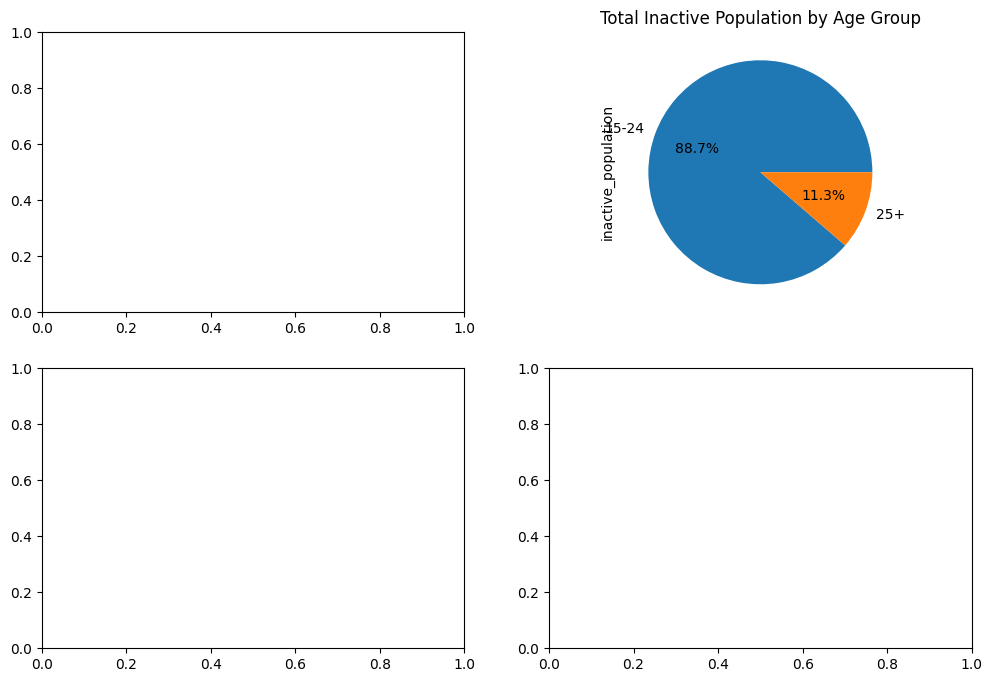

In [259]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
# Plot 2: Total Inactive Population by Age Group
df4.groupby('age_group')['inactive_population'].sum().plot(kind='pie', autopct='%1.1f%%', ax=axes[0, 1])
axes[0, 1].set_title('Total Inactive Population by Age Group')

### 4.	Using the employed by sex, age and economic activity indicator in the dataset, apply the shares of each ISIC REV 4 sector to the total employed population to get absolute numbers for each sector. Please note that the obs value provided by the ILO does not represent the population. It should only be used to get shares for each sector. I.e shares for agric = agric obs value/ total for ISIC REV 4 sectors. This share should then be multiplied by the employed population

In [204]:
#loading the economic data
economic_activity = pd.read_csv('Emp_economic.csv')
economic_activity.head()

,indicator.label,sex.label,classif1.label,classif2.label,time,obs_value
0,"Employment by sex, age and economic activity (...",Sex: Total,"Age (Youth, adults): 15+",Economic activity (ISIC-Rev.4): Total,2019,18724.541
1,"Employment by sex, age and economic activity (...",Sex: Total,"Age (Youth, adults): 15+",Economic activity (ISIC-Rev.4): A. Agriculture...,2019,6288.368
2,"Employment by sex, age and economic activity (...",Sex: Total,"Age (Youth, adults): 15+",Economic activity (ISIC-Rev.4): B. Mining and ...,2019,161.644
3,"Employment by sex, age and economic activity (...",Sex: Total,"Age (Youth, adults): 15+",Economic activity (ISIC-Rev.4): C. Manufacturing,2019,1283.218
4,"Employment by sex, age and economic activity (...",Sex: Total,"Age (Youth, adults): 15+",Economic activity (ISIC-Rev.4): D. Electricity...,2019,16.395


In [205]:
# drop records with Sex Total
economic_activity = economic_activity[economic_activity['sex.label'] != 'Sex: Total']

# drop records with age 15+
economic_activity = economic_activity[economic_activity['classif1.label'] != 'Age (Youth, adults): 15+']

#drop record with age 15-64
economic_activity = economic_activity[economic_activity['classif1.label'] != 'Age (Youth, adults): 15-64']
economic_activity


,indicator.label,sex.label,classif1.label,classif2.label,time,obs_value
130,"Employment by sex, age and economic activity (...",Sex: Male,"Age (Youth, adults): 15-24",Economic activity (ISIC-Rev.4): Total,2019,1613.832
131,"Employment by sex, age and economic activity (...",Sex: Male,"Age (Youth, adults): 15-24",Economic activity (ISIC-Rev.4): A. Agriculture...,2019,597.013
132,"Employment by sex, age and economic activity (...",Sex: Male,"Age (Youth, adults): 15-24",Economic activity (ISIC-Rev.4): B. Mining and ...,2019,15.825
133,"Employment by sex, age and economic activity (...",Sex: Male,"Age (Youth, adults): 15-24",Economic activity (ISIC-Rev.4): C. Manufacturing,2019,108.756
134,"Employment by sex, age and economic activity (...",Sex: Male,"Age (Youth, adults): 15-24",Economic activity (ISIC-Rev.4): D. Electricity...,2019,NaN
...,...,...,...,...,...,...
255,"Employment by sex, age and economic activity (...",Sex: Female,"Age (Youth, adults): 25+","Economic activity (ISIC-Rev.4): R. Arts, enter...",2019,12.371
256,"Employment by sex, age and economic activity (...",Sex: Female,"Age (Youth, adults): 25+",Economic activity (ISIC-Rev.4): S. Other servi...,2019,286.629
257,"Employment by sex, age and economic activity (...",Sex: Female,"Age (Youth, adults): 25+",Economic activity (ISIC-Rev.4): T. Activities ...,2019,327.240
258,"Employment by sex, age and economic activity (...",Sex: Female,"Age (Youth, adults): 25+",Economic activity (ISIC-Rev.4): U. Activities ...,2019,NaN


In [206]:
# Define mappings for classif1.label , classif2.label and sex.label
econ_classif1_mapping = {
    "Age (Youth, adults): 15-24": "15-24",
    "Age (Youth, adults): 25+": "25+"
}
econ_sex_mapping = {
    "Sex: Female": "female",
    "Sex: Male": "male"
}
econ_classif2_mapping = {
    'Economic activity (ISIC-Rev.4): Total': 'total',
 'Economic activity (ISIC-Rev.4): A. Agriculture; forestry and fishing': 'Agricullture, forestry and fishing',
 'Economic activity (ISIC-Rev.4): B. Mining and quarrying': 'Mining and Quarrying',
 'Economic activity (ISIC-Rev.4): C. Manufacturing': 'Manufacturing',
 'Economic activity (ISIC-Rev.4): E. Water supply; sewerage, waste management and remediation activities': ' Water supply, sewerage, waste management and remediation activities',
 'Economic activity (ISIC-Rev.4): H. Transportation and storage': 'Transportation and storage',
 'Economic activity (ISIC-Rev.4): I. Accommodation and food service activities': 'Accommodation and food service activities',
 'Economic activity (ISIC-Rev.4): J. Information and communication': 'Information and communication',
 'Economic activity (ISIC-Rev.4): K. Financial and insurance activities': 'Financial and insurance activities',
 'Economic activity (ISIC-Rev.4): L. Real estate activities': 'Real estate activities',
 'Economic activity (ISIC-Rev.4): M. Professional, scientific and technical activities': 'Professional, scientific and technical activities',
 'Economic activity (ISIC-Rev.4): N. Administrative and support service activities': 'Administrative and support service activities',
 'Economic activity (ISIC-Rev.4): O. Public administration and defence; compulsory social security': 'Public administration and defence, compulsory social security',
 'Economic activity (ISIC-Rev.4): P. Education': 'Education',
 'Economic activity (ISIC-Rev.4): D. Electricity; gas, steam and air conditioning supply': 'Electricity; gas, steam and air conditioning supply',
 'Economic activity (ISIC-Rev.4): Q. Human health and social work activities': 'Human health and social work activities',
 'Economic activity (ISIC-Rev.4): R. Arts, entertainment and recreation': 'Arts, entertainment and recreation',
 'Economic activity (ISIC-Rev.4): S. Other service activities': 'Other service activities',
 'Economic activity (ISIC-Rev.4): X. Not elsewhere classified': 'Not Elsewhere classified',
 'Economic activity (ISIC-Rev.4): F. Construction': 'Construction',
 'Economic activity (ISIC-Rev.4): G. Wholesale and retail trade; repair of motor vehicles and motorcycles': 'Wholesale and retail trade; repair of motor vehicles and motorcycles',
 'Economic activity (ISIC-Rev.4): U. Activities of extraterritorial organizations and bodies': 'Activities of extraterritorial organizations and bodies',
 'Economic activity (ISIC-Rev.4): T. Activities of households as employers; undifferentiated goods- and services-producing activities of households for own use': 'Activities of households as employers; undifferentiated goods- and services-producing activities of households for own use'
}

# Apply mappings to create Renamed  column values
economic_activity["age_group"] = economic_activity["classif1.label"].map(econ_classif1_mapping)
economic_activity["sex"] = economic_activity["sex.label"].map(econ_sex_mapping)
economic_activity['economic_activity'] = economic_activity['classif2.label'].map(econ_classif2_mapping)
economic_activity

#economic_activity.to_csv(csv_file_path, index=False)

# Dropping the initial classif1.label, sex.label, classif2.label
economic_activity.drop(['sex.label','classif1.label','classif2.label'],axis=1,inplace=True)



In [207]:
economic_activity

,indicator.label,time,obs_value,age_group,sex,economic_activity
130,"Employment by sex, age and economic activity (...",2019,1613.832,15-24,male,total
131,"Employment by sex, age and economic activity (...",2019,597.013,15-24,male,"Agricullture, forestry and fishing"
132,"Employment by sex, age and economic activity (...",2019,15.825,15-24,male,Mining and Quarrying
133,"Employment by sex, age and economic activity (...",2019,108.756,15-24,male,Manufacturing
134,"Employment by sex, age and economic activity (...",2019,NaN,15-24,male,"Electricity; gas, steam and air conditioning s..."
...,...,...,...,...,...,...
255,"Employment by sex, age and economic activity (...",2019,12.371,25+,female,"Arts, entertainment and recreation"
256,"Employment by sex, age and economic activity (...",2019,286.629,25+,female,Other service activities
257,"Employment by sex, age and economic activity (...",2019,327.240,25+,female,Activities of households as employers; undiffe...
258,"Employment by sex, age and economic activity (...",2019,NaN,25+,female,Activities of extraterritorial organizations a...


In [208]:
# split the data based on the age ( 15-24, 25+)
age_column = "age_group"

# Split the DataFrame based on age 
df_15_24= economic_activity[economic_activity[age_column] == "15-24"]
df_25_plus = economic_activity[economic_activity[age_column] == "25+"]



# splitting the 15-24 into male and female  
total_male_15_24=  df_15_24[df_15_24["sex"] == "male"][df_15_24["economic_activity"] == "total"]["obs_value"]
total_male_15_24

total_female_15_24 = df_15_24[df_15_24["sex"] == "female"][df_15_24["economic_activity"] == "total"]["obs_value"]
total_female_15_24

# Initialize an empty list to store shares
shares_list = [] 

# Loop through the DataFrame rows and calculate shares
for index, row in df_15_24.iterrows():
    if row['sex'] == 'female':
        share = (row['obs_value'] / total_female_15_24)
        #share = share[1]
        #print(f"==> {share}")  

    else:
        share = row['obs_value'] / total_male_15_24
         
    shares_list.append(share)  # Append the calculated share to the list

# Assign the shares list to the 'shares' column in the DataFrame
#df_15_24['shares'] = shares_list
#

# Share data
shr_data = {'share': 
    ['130  1.0 Name: obs_value, dtype: float64',
 '130    0.369935 Name: obs_value, dtype: float64',
 '130    0.009806 Name: obs_value, dtype: float64',
 '130    0.06739 Name: obs_value, dtype: float64',
 '130   NaN Name: obs_value, dtype: float64',
 '130    0.004135 Name: obs_value, dtype: float64',
 '130    0.085303 Name: obs_value, dtype: float64',
 '130    0.1943 Name: obs_value, dtype: float64',
 '130    0.076461 Name: obs_value, dtype: float64',
 '130    0.032888 Name: obs_value, dtype: float64',
 '130    0.005183 Name: obs_value, dtype: float64',
 '130    0.004987 Name: obs_value, dtype: float64',
 '130    0.001794 Name: obs_value, dtype: float64',
 '130    0.004162 Name: obs_value, dtype: float64',
 '130    0.01999 Name: obs_value, dtype: float64',
 '130    0.020065 Name: obs_value, dtype: float64',
 '130    0.034218 Name: obs_value, dtype: float64',
 '130    0.011259 Name: obs_value, dtype: float64',
' 130    0.004757 Name: obs_value, dtype: float64',
 '130    0.020986 Name: obs_value, dtype: float64',
 '130    0.031087 Name: obs_value, dtype: float64',
 '216    1.0 Name: obs_value, dtype: float64',
 '216    0.328172 Name: obs_value, dtype: float64',
 '216    0.007453 Name: obs_value, dtype: float64',
 '216    0.068082 Name: obs_value, dtype: float64',
 '216    0.003288 Name: obs_value, dtype: float64',
 '216    0.042384 Name: obs_value, dtype: float64',
 '216    0.206942 Name: obs_value, dtype: float64',
 '216    0.03027 Name: obs_value, dtype: float64',
 '216    0.055839 Name: obs_value, dtype: float64',
 '216    0.003184 Name: obs_value, dtype: float64',
 '216    0.016027 Name: obs_value, dtype: float64',
 '216   NaN Name: obs_value, dtype: float64',
 '216    0.005942 Name: obs_value, dtype: float64',
 '216    0.0183 Name: obs_value, dtype: float64',
 '216    0.012768 Name: obs_value, dtype: float64',
 '216    0.056535 Name: obs_value, dtype: float64',
 '216    0.018167 Name: obs_value, dtype: float64',
 '216   NaN Name: obs_value, dtype: float64',
' 216    0.044659 Name: obs_value, dtype: float64',
 '216    0.079715Name: obs_value, dtype: float64',
 '216   NaN Name: obs_value, dtype: float64']}

df_shr= pd.DataFrame(shr_data)

# Use regular expressions to extract numerical values
#df_shr['shares'] = df_shr['shares'].str.extract(r'130\s+([\d.]+)|216\s+([\d.]+)').astype(float)
#df['shares'] = df['shares'].str.extract(r'130\s+([\d.]+)').astype(float)

# Use regular expressions to extract numerical values
df_shr['shares'] = df_shr['share'].str.extract(r'\d+\s+(\d+\.\d+)').astype(float)
print(df_shr)
#df_15_24["shares"] = df_shr['shares'].str.extract(r'130\s+([\d.]+)').astype(float)
#df_15_24.to_csv('shares.csv', index=False) 


                                               share    shares
0           130  1.0 Name: obs_value, dtype: float64  1.000000
1    130    0.369935 Name: obs_value, dtype: float64  0.369935
2    130    0.009806 Name: obs_value, dtype: float64  0.009806
3     130    0.06739 Name: obs_value, dtype: float64  0.067390
4          130   NaN Name: obs_value, dtype: float64       NaN
5    130    0.004135 Name: obs_value, dtype: float64  0.004135
6    130    0.085303 Name: obs_value, dtype: float64  0.085303
7      130    0.1943 Name: obs_value, dtype: float64  0.194300
8    130    0.076461 Name: obs_value, dtype: float64  0.076461
9    130    0.032888 Name: obs_value, dtype: float64  0.032888
10   130    0.005183 Name: obs_value, dtype: float64  0.005183
11   130    0.004987 Name: obs_value, dtype: float64  0.004987
12   130    0.001794 Name: obs_value, dtype: float64  0.001794
13   130    0.004162 Name: obs_value, dtype: float64  0.004162
14    130    0.01999 Name: obs_value, dtype: float64  0

C:\Users\USER\AppData\Local\Temp\ipykernel_7008\2849431722.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  total_male_15_24=  df_15_24[df_15_24["sex"] == "male"][df_15_24["economic_activity"] == "total"]["obs_value"]
C:\Users\USER\AppData\Local\Temp\ipykernel_7008\2849431722.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  total_female_15_24 = df_15_24[df_15_24["sex"] == "female"][df_15_24["economic_activity"] == "total"]["obs_value"]


In [209]:
total_male_15_24

130    1613.832
Name: obs_value, dtype: float64

In [210]:
# Reset the index and drop the old index column
df_15_24 = df_15_24.reset_index(drop=True)

# combining the share data and economic activity for 15_24 age group
economic_shares=pd.concat([df_15_24,df_shr],axis=1)
economic_shares
# dropping the extra shares column
economic_shares=economic_shares.drop(['share'],axis=1)
economic_shares



,indicator.label,time,obs_value,age_group,sex,economic_activity,shares
0,"Employment by sex, age and economic activity (...",2019,1613.832,15-24,male,total,1.000000
1,"Employment by sex, age and economic activity (...",2019,597.013,15-24,male,"Agricullture, forestry and fishing",0.369935
2,"Employment by sex, age and economic activity (...",2019,15.825,15-24,male,Mining and Quarrying,0.009806
3,"Employment by sex, age and economic activity (...",2019,108.756,15-24,male,Manufacturing,0.067390
4,"Employment by sex, age and economic activity (...",2019,NaN,15-24,male,"Electricity; gas, steam and air conditioning s...",NaN
5,"Employment by sex, age and economic activity (...",2019,6.674,15-24,male,"Water supply, sewerage, waste management and ...",0.004135
6,"Employment by sex, age and economic activity (...",2019,137.664,15-24,male,Construction,0.085303
7,"Employment by sex, age and economic activity (...",2019,313.567,15-24,male,Wholesale and retail trade; repair of motor ve...,0.194300
8,"Employment by sex, age and economic activity (...",2019,123.395,15-24,male,Transportation and storage,0.076461
9,"Employment by sex, age and economic activity (...",2019,53.076,15-24,male,Accommodation and food service activities,0.032888


#### Calculating the shares for the 25+ group

In [211]:
##  Working on the 25+ age group
 
# Reset the index and drop the old index column
df_25_plus = df_25_plus.reset_index(drop=True)



In [212]:
# getting the total male obs_value
total_male_25_plus=  df_25_plus[df_25_plus["sex"] == "male"][df_25_plus["economic_activity"] == "total"]["obs_value"]
#total_male_25_plus
# getting the total female obs_value
total_female_25_plus = df_25_plus[df_25_plus["sex"] == "female"][df_25_plus["economic_activity"] == "total"]["obs_value"]
#total_female_25_plus

# Initialize an empty list to store shares
shares_list = [] 

# Loop through the DataFrame rows and calculate shares
for index, row in df_25_plus.iterrows():
    if row['sex'] == 'female':
        share= (row['obs_value'] / total_female_25_plus)
    else:
        share= row['obs_value'] / total_male_25_plus    
    shares_list.append(share)  # Append the calculated share to the list

shr_data_25_plus= {'share':shares_list}
 
numbers = [] 
for entry in shr_data_25_plus['share']:
    match = re.search(r'(\d+)\s+([\d.]+|NaN)\nName:', str(entry))
    if match:
        num_type = int(match.group(1))
        num_value = match.group(2) 
        if num_value == 'NaN':
            num_value = np.nan 
        else:
            num_value = float(num_value)
        if num_type in [0, 22]:
            numbers.append(num_value)
 
df_25_plus['shares'] = numbers
df_25_plus  


C:\Users\USER\AppData\Local\Temp\ipykernel_7008\4062674331.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  total_male_25_plus=  df_25_plus[df_25_plus["sex"] == "male"][df_25_plus["economic_activity"] == "total"]["obs_value"]
C:\Users\USER\AppData\Local\Temp\ipykernel_7008\4062674331.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  total_female_25_plus = df_25_plus[df_25_plus["sex"] == "female"][df_25_plus["economic_activity"] == "total"]["obs_value"]


,indicator.label,time,obs_value,age_group,sex,economic_activity,shares
0,"Employment by sex, age and economic activity (...",2019,8191.277,25+,male,total,1.000000
1,"Employment by sex, age and economic activity (...",2019,2499.276,25+,male,"Agricullture, forestry and fishing",0.305114
2,"Employment by sex, age and economic activity (...",2019,86.368,25+,male,Mining and Quarrying,0.010544
3,"Employment by sex, age and economic activity (...",2019,624.965,25+,male,Manufacturing,0.076296
4,"Employment by sex, age and economic activity (...",2019,11.122,25+,male,"Electricity; gas, steam and air conditioning s...",0.001358
5,"Employment by sex, age and economic activity (...",2019,20.039,25+,male,"Water supply, sewerage, waste management and ...",0.002446
6,"Employment by sex, age and economic activity (...",2019,870.396,25+,male,Construction,0.106259
7,"Employment by sex, age and economic activity (...",2019,1339.036,25+,male,Wholesale and retail trade; repair of motor ve...,0.163471
8,"Employment by sex, age and economic activity (...",2019,789.858,25+,male,Transportation and storage,0.096427
9,"Employment by sex, age and economic activity (...",2019,218.748,25+,male,Accommodation and food service activities,0.026705


In [213]:
#remove rows with NaN vlaues if the number of NaN values is below 15%
# Calculating the percentage of missing values #
ratio_of_nans = (df_25_plus.isna().sum())/(df_25_plus.shape[0])*100
if( ratio_of_nans['obs_value'] <= 15):
    columns_to_check = ['obs_value']
    df_25_plus.dropna(subset=columns_to_check, inplace=True)
    df_25_plus.dropna(axis=0)

df_25_plus 


,indicator.label,time,obs_value,age_group,sex,economic_activity,shares
0,"Employment by sex, age and economic activity (...",2019,8191.277,25+,male,total,1.000000
1,"Employment by sex, age and economic activity (...",2019,2499.276,25+,male,"Agricullture, forestry and fishing",0.305114
2,"Employment by sex, age and economic activity (...",2019,86.368,25+,male,Mining and Quarrying,0.010544
3,"Employment by sex, age and economic activity (...",2019,624.965,25+,male,Manufacturing,0.076296
4,"Employment by sex, age and economic activity (...",2019,11.122,25+,male,"Electricity; gas, steam and air conditioning s...",0.001358
5,"Employment by sex, age and economic activity (...",2019,20.039,25+,male,"Water supply, sewerage, waste management and ...",0.002446
6,"Employment by sex, age and economic activity (...",2019,870.396,25+,male,Construction,0.106259
7,"Employment by sex, age and economic activity (...",2019,1339.036,25+,male,Wholesale and retail trade; repair of motor ve...,0.163471
8,"Employment by sex, age and economic activity (...",2019,789.858,25+,male,Transportation and storage,0.096427
9,"Employment by sex, age and economic activity (...",2019,218.748,25+,male,Accommodation and food service activities,0.026705


In [214]:
#remove rows with NaN values if the number of NaN values is below 15%
# Calculating the percentage of missing values #
df_15_24 = economic_shares
ratio_of_nans = (df_15_24.isna().sum())/(df_15_24.shape[0])*100
if( ratio_of_nans['obs_value'] <= 15):
    columns_to_check = ['obs_value']
    df_15_24.dropna(subset=columns_to_check, inplace=True)
    df_15_24.dropna(axis=0)

df_15_24 

,indicator.label,time,obs_value,age_group,sex,economic_activity,shares
0,"Employment by sex, age and economic activity (...",2019,1613.832,15-24,male,total,1.000000
1,"Employment by sex, age and economic activity (...",2019,597.013,15-24,male,"Agricullture, forestry and fishing",0.369935
2,"Employment by sex, age and economic activity (...",2019,15.825,15-24,male,Mining and Quarrying,0.009806
3,"Employment by sex, age and economic activity (...",2019,108.756,15-24,male,Manufacturing,0.067390
5,"Employment by sex, age and economic activity (...",2019,6.674,15-24,male,"Water supply, sewerage, waste management and ...",0.004135
6,"Employment by sex, age and economic activity (...",2019,137.664,15-24,male,Construction,0.085303
7,"Employment by sex, age and economic activity (...",2019,313.567,15-24,male,Wholesale and retail trade; repair of motor ve...,0.194300
8,"Employment by sex, age and economic activity (...",2019,123.395,15-24,male,Transportation and storage,0.076461
9,"Employment by sex, age and economic activity (...",2019,53.076,15-24,male,Accommodation and food service activities,0.032888
10,"Employment by sex, age and economic activity (...",2019,8.365,15-24,male,Information and communication,0.005183


In [215]:
# merging the 25+ and 15-24 age group data
df= pd.concat([df_25_plus, df_15_24]).reset_index(drop=True)
df 

# filtering data focusing on Transportation and Storage & IT sector
target_economic_activities = ["Transportation and storage", "Information and communication"]

# Filter the DataFrame based on specified activities
filtered_df = df[df['economic_activity'].isin(target_economic_activities)] 
filtered_df 

# sort by economic activity
df_sorted = filtered_df.sort_values(by='economic_activity')
df_sorted 

# Reverse the order of the DataFrame
reversed_df = df_sorted[::-1].reset_index(drop=True)
reversed_df["employed_population"] = [1.965558e+06,2.034689e+06,3.370769e+06,3.568065e+06,1.965558e+06,2.034689e+06,3.370769e+06,3.568065e+06]
reversed_df


,indicator.label,time,obs_value,age_group,sex,economic_activity,shares,employed_population
0,"Employment by sex, age and economic activity (...",2019,42.405,15-24,female,Transportation and storage,0.030270,1965558.0
1,"Employment by sex, age and economic activity (...",2019,123.395,15-24,male,Transportation and storage,0.076461,2034689.0
2,"Employment by sex, age and economic activity (...",2019,171.682,25+,female,Transportation and storage,0.022834,3370769.0
3,"Employment by sex, age and economic activity (...",2019,789.858,25+,male,Transportation and storage,0.096427,3568065.0
4,"Employment by sex, age and economic activity (...",2019,4.460,15-24,female,Information and communication,0.003184,1965558.0
5,"Employment by sex, age and economic activity (...",2019,8.365,15-24,male,Information and communication,0.005183,2034689.0
6,"Employment by sex, age and economic activity (...",2019,9.566,25+,female,Information and communication,0.001272,3370769.0
7,"Employment by sex, age and economic activity (...",2019,46.926,25+,male,Information and communication,0.005729,3568065.0


In [216]:
# filter employed population in 2019 we narrow down to Age, gender and total _employed..
total_employed_df = df4

# filter based on the year 2019 
#time_filtered_df 
target = ["sex","age_group","time", "total_employed_population"]
filtered_df = total_employed_df[target]
#filtered_df
time_filtered_df = filtered_df[filtered_df["time"] == 2019]
time_filtered_df 


,sex,age_group,time,total_employed_population
16,female,15-24,2019,1.965558e+06
17,male,15-24,2019,2.034689e+06
18,female,25+,2019,3.370769e+06
19,male,25+,2019,3.568065e+06


In [217]:
reversed_df['sector_employed_population'] = reversed_df['shares']*reversed_df['employed_population']
reversed_df

,indicator.label,time,obs_value,age_group,sex,economic_activity,shares,employed_population,sector_employed_population
0,"Employment by sex, age and economic activity (...",2019,42.405,15-24,female,Transportation and storage,0.030270,1965558.0,59497.440660
1,"Employment by sex, age and economic activity (...",2019,123.395,15-24,male,Transportation and storage,0.076461,2034689.0,155574.355629
2,"Employment by sex, age and economic activity (...",2019,171.682,25+,female,Transportation and storage,0.022834,3370769.0,76968.139346
3,"Employment by sex, age and economic activity (...",2019,789.858,25+,male,Transportation and storage,0.096427,3568065.0,344057.803755
4,"Employment by sex, age and economic activity (...",2019,4.460,15-24,female,Information and communication,0.003184,1965558.0,6258.336672
5,"Employment by sex, age and economic activity (...",2019,8.365,15-24,male,Information and communication,0.005183,2034689.0,10545.793087
6,"Employment by sex, age and economic activity (...",2019,9.566,25+,female,Information and communication,0.001272,3370769.0,4287.618168
7,"Employment by sex, age and economic activity (...",2019,46.926,25+,male,Information and communication,0.005729,3568065.0,20441.444385


#### 6.Calculation of Growth Rate

In [218]:
empl_sex_econ_df = pd.read_csv('./Emp_sex_econ.csv')
empl_sex_econ_df

# format the sex.label ot only have total, female and male
# Define mappings for classif1.label and sex.label
classif1_mapping = {
    "Economic activity (Detailed): Total": "total",
    "Economic activity (Detailed): Agriculture; forestry and fishing ~ISIC rev.4 A": "Agriculture; forestry and fishing",
    "Economic activity (Detailed): Mining and quarrying ~ISIC rev.4 B":"Mining and quarrying",
    "Economic activity (Detailed): Manufacturing ~ISIC rev.4 C":"Manufacturing",
    "Economic activity (Detailed): Utilities ~ISIC rev.4 D; E":"Utilities",
    "Economic activity (Detailed): Construction ~ISIC rev.4 F":"Construction",
    "Economic activity (Detailed): Wholesale and retail trade; repair of motor vehicles and motorcycles ~ISIC rev.4 G":"Wholesale and Retail Trade",
    "Economic activity (Detailed): Transport; storage and communication ~ISIC rev.4 H; J":"Transport,Storage and Communication",
    "Economic activity (Detailed): Accommodation and food service activities ~ISIC rev.4 I":"Accomodation and food service activities",
    "Economic activity (Detailed): Financial and insurance activities ~ISIC rev.4 K ":"Financial and insurance activities",
    "Economic activity (Detailed): Real estate; business and administrative activities ~ISIC rev.4 L; M; N":"Real estate,Business and administrative activities",
    "Economic activity (Detailed): Public administration and defence; compulsory social security ~ISIC rev.4 O":"Public administration and defence",
    "Economic activity (Detailed): Education ~ISIC rev.4 P":"Education",
    "Economic activity (Detailed): Human health and social work activities ~ISIC rev.4 Q":"Human health and social work activities",
    "Economic activity (Detailed): Other services ~ISIC rev.4 R; S; T; U":"Other services"
}

sex_mapping = {
    "Sex: Female": "female",
    "Sex: Male": "male",
    "Sex: Total": "total"
}

# Apply mappings to create formatted columns
empl_sex_econ_df["sex"] = empl_sex_econ_df["sex.label"].map(sex_mapping)
empl_sex_econ_df ["classif1.label"] = empl_sex_econ_df["classif1.label"].map(classif1_mapping)
# drop sex.label column
empl_sex_econ_df.drop(['sex.label'],axis=1,inplace=True)
empl_sex_econ_df
# drop recors with sex == total
empl_sex_econ_df_filtered = empl_sex_econ_df[empl_sex_econ_df['sex'] != 'total']
empl_sex_econ_df_filtered

# filtering data focusing on Transportation and Storage & IT sector
target_economic_activities = ["Transport,Storage and Communication"]

# Filter the DataFrame based on specified activities
ict_data = empl_sex_econ_df_filtered[empl_sex_econ_df_filtered["classif1.label"].str.strip().isin(target_economic_activities)] 
ict_data 

,indicator.label,classif1.label,time,obs_value,sex
22,Employment by sex and economic activity -- ILO...,"Transport,Storage and Communication",2021,1113.114,male
37,Employment by sex and economic activity -- ILO...,"Transport,Storage and Communication",2021,285.644,female
67,Employment by sex and economic activity -- ILO...,"Transport,Storage and Communication",2020,1079.311,male
82,Employment by sex and economic activity -- ILO...,"Transport,Storage and Communication",2020,274.738,female
112,Employment by sex and economic activity -- ILO...,"Transport,Storage and Communication",2019,1102.437,male
127,Employment by sex and economic activity -- ILO...,"Transport,Storage and Communication",2019,280.328,female
157,Employment by sex and economic activity -- ILO...,"Transport,Storage and Communication",2018,1066.934,male
172,Employment by sex and economic activity -- ILO...,"Transport,Storage and Communication",2018,269.503,female
202,Employment by sex and economic activity -- ILO...,"Transport,Storage and Communication",2017,1021.110,male
217,Employment by sex and economic activity -- ILO...,"Transport,Storage and Communication",2017,251.458,female


###### Growth-Rate calculation

In [219]:
# split between male and female 
female_df = ict_data[ict_data['sex'] == 'female']
male_df = ict_data[ict_data['sex'] == 'male'] 
# reseting index
female_df = female_df.reset_index(drop=True) 
male_df = male_df.reset_index(drop=True)

# Calculate growth rates and add to the DataFrame
female_df['growth_rate (%)'] = 100*(female_df['obs_value']).pct_change()
male_df['growth_rate (%)'] = 100*(male_df['obs_value']).pct_change()


#### 7. Shares calculation of employement and unemployemnt 

In [220]:
# load data
#inactive_sex_age_edu_df = pd.read_csv('Inact_sex_age.csv')
unemployment_sex_age_edu = pd.read_csv('Unemployment_sex_age_edu.csv')
inactive_age_sex_age_edu = pd.read_csv('Inact_sex_age_edu.csv')
inactive_age_sex_age_edu

# cleaning
sex_mapping = {
    "Sex: Female": "female",
    "Sex: Male": "male"
}
classif2_mapping = {
    "Education (Aggregate levels): Total": "Total",
    "Education (Aggregate levels): Less than basic": "Less than basic",
    "Education (Aggregate levels): Basic":"basic",
    "Education (Aggregate levels): Intermediate":"Intermediate",
    "Education (Aggregate levels): Advanced":"Advanced",
    "Education (Aggregate levels): Level not stated":"Level not stated"
}
classif1_mapping = {
    "Age (Youth, adults): 15-24": "15-24",
    "Age (Youth, adults): 25+": "25+"
}

# Apply mappings to create formatted columns
inactive_age_sex_age_edu["sex"] = inactive_age_sex_age_edu["sex.label"].map(sex_mapping)
inactive_age_sex_age_edu.drop(['sex.label'],axis=1,inplace=True)
inactive_age_sex_age_edu ["classif2.label"] = inactive_age_sex_age_edu["classif2.label"].map(classif2_mapping)
inactive_age_sex_age_edu ["classif1.label"] = inactive_age_sex_age_edu["classif1.label"].map(classif1_mapping)

# dropping NaN values
inactive_age_sex_age_edu.dropna(inplace=True)

#Resetting the index
inactive_age_sex_age_edu = inactive_age_sex_age_edu.reset_index(drop=True) 
inactive_age_sex_age_edu


,indicator.label,classif1.label,classif2.label,time,obs_value,sex
0,"Inactivity rate by sex, age and education (%)",15-24,Total,2019,59.77,male
1,"Inactivity rate by sex, age and education (%)",15-24,Less than basic,2019,54.49,male
2,"Inactivity rate by sex, age and education (%)",15-24,basic,2019,66.21,male
3,"Inactivity rate by sex, age and education (%)",15-24,Intermediate,2019,46.86,male
4,"Inactivity rate by sex, age and education (%)",15-24,Advanced,2019,23.63,male
...,...,...,...,...,...,...
91,"Inactivity rate by sex, age and education (%)",25+,Less than basic,2005,39.71,female
92,"Inactivity rate by sex, age and education (%)",25+,basic,2005,24.70,female
93,"Inactivity rate by sex, age and education (%)",25+,Intermediate,2005,21.31,female
94,"Inactivity rate by sex, age and education (%)",25+,Advanced,2005,27.17,female


In [221]:
# filter times from 2019, 2016, 2006, 2005
target_years = [2019, 2016, 2006, 2005]
inactive_population = df4[df4['time'].isin(target_years)]
inactive_population


,time,age_group,sex,obs_value,total_population,inactive_population,labour_force,total_unemployed_population,total_employed_population
4,2016,15-24,female,7.371,4962468.832,2.796897e+06,2.165572e+06,159624.295432,2.005947e+06
5,2016,15-24,male,7.378,4986519.680,2.665045e+06,2.321474e+06,171278.369208,2.150196e+06
6,2016,25+,female,1.787,3778345.472,5.396611e+05,3.238684e+06,57875.290018,3.180809e+06
7,2016,25+,male,1.347,3742889.280,2.432504e+05,3.499639e+06,47140.136060,3.452499e+06
16,2019,15-24,female,13.175,5395561.408,3.131746e+06,2.263816e+06,298257.718469,1.965558e+06
17,2019,15-24,male,11.675,5425433.120,3.121794e+06,2.303639e+06,268949.841896,2.034689e+06
18,2019,25+,female,3.322,3997837.568,5.112435e+05,3.486594e+06,115824.655995,3.370769e+06
19,2019,25+,male,3.166,3963432.000,2.787085e+05,3.684723e+06,116658.344799,3.568065e+06


In [222]:
# filetring based on the available 
target_years = [2019, 2016]
inactive_age_sex_age_edu = inactive_age_sex_age_edu[inactive_age_sex_age_edu['time'].isin(target_years)]
inactive_age_sex_age_edu = inactive_age_sex_age_edu[inactive_age_sex_age_edu['classif2.label'] != 'Total']
inactive_age_sex_age_edu

,indicator.label,classif1.label,classif2.label,time,obs_value,sex
1,"Inactivity rate by sex, age and education (%)",15-24,Less than basic,2019,54.49,male
2,"Inactivity rate by sex, age and education (%)",15-24,basic,2019,66.21,male
3,"Inactivity rate by sex, age and education (%)",15-24,Intermediate,2019,46.86,male
4,"Inactivity rate by sex, age and education (%)",15-24,Advanced,2019,23.63,male
5,"Inactivity rate by sex, age and education (%)",15-24,Level not stated,2019,84.21,male
7,"Inactivity rate by sex, age and education (%)",25+,Less than basic,2019,21.77,male
8,"Inactivity rate by sex, age and education (%)",25+,basic,2019,9.11,male
9,"Inactivity rate by sex, age and education (%)",25+,Intermediate,2019,8.00,male
10,"Inactivity rate by sex, age and education (%)",25+,Advanced,2019,9.44,male
11,"Inactivity rate by sex, age and education (%)",25+,Level not stated,2019,19.78,male


In [223]:
male_15_24_2019 = [3.121794e+06, 3.121794e+06, 3.121794e+06, 3.121794e+06, 3.121794e+06]
male_25_plus_2019 = [2.787085e+05,2.787085e+05,2.787085e+05,2.787085e+05,2.787085e+05]
female_15_24_2019 = [3.131746e+06,3.131746e+06,3.131746e+06,3.131746e+06,3.131746e+06]
female_25_plus_2019 = [5.112435e+05,5.112435e+05,5.112435e+05,5.112435e+05,5.112435e+05]
male_15_24_2016 = [2.665045e+06,2.665045e+06,2.665045e+06,2.665045e+06,2.665045e+06]
male_25_plus_2016 = [2.432504e+05,2.432504e+05,2.432504e+05,2.432504e+05,2.432504e+05]
female_15_24_2016 = [2.796897e+06,2.796897e+06,2.796897e+06,2.796897e+06,2.796897e+06]
female_25_plus_2016 = [5.396611e+05,5.396611e+05,5.396611e+05,5.396611e+05,5.396611e+05]

inactive_age_sex_age_edu['educated_inactive_population'] = [3.121794e+06, 3.121794e+06, 3.121794e+06, 3.121794e+06, 3.121794e+06,2.787085e+05,2.787085e+05,2.787085e+05,2.787085e+05,2.787085e+05,3.131746e+06,3.131746e+06,3.131746e+06,3.131746e+06,3.131746e+06,5.112435e+05,5.112435e+05,5.112435e+05,5.112435e+05,5.112435e+05,2.665045e+06,2.665045e+06,2.665045e+06,2.665045e+06,2.665045e+06,2.432504e+05,2.432504e+05,2.432504e+05,2.432504e+05,2.432504e+05,2.796897e+06,2.796897e+06,2.796897e+06,2.796897e+06,2.796897e+06,5.396611e+05,5.396611e+05,5.396611e+05,5.396611e+05,5.396611e+05] 

#population = (obs_value/100)* educated_inative_population
inactive_age_sex_age_edu["population"] =  (inactive_age_sex_age_edu['obs_value']/100)*inactive_age_sex_age_edu['educated_inactive_population']
inactive_age_sex_age_edu

,indicator.label,classif1.label,classif2.label,time,obs_value,sex,educated_inactive_population,population
1,"Inactivity rate by sex, age and education (%)",15-24,Less than basic,2019,54.49,male,3121794.0,1.701066e+06
2,"Inactivity rate by sex, age and education (%)",15-24,basic,2019,66.21,male,3121794.0,2.066940e+06
3,"Inactivity rate by sex, age and education (%)",15-24,Intermediate,2019,46.86,male,3121794.0,1.462873e+06
4,"Inactivity rate by sex, age and education (%)",15-24,Advanced,2019,23.63,male,3121794.0,7.376799e+05
5,"Inactivity rate by sex, age and education (%)",15-24,Level not stated,2019,84.21,male,3121794.0,2.628863e+06
7,"Inactivity rate by sex, age and education (%)",25+,Less than basic,2019,21.77,male,278708.5,6.067484e+04
8,"Inactivity rate by sex, age and education (%)",25+,basic,2019,9.11,male,278708.5,2.539034e+04
9,"Inactivity rate by sex, age and education (%)",25+,Intermediate,2019,8.00,male,278708.5,2.229668e+04
10,"Inactivity rate by sex, age and education (%)",25+,Advanced,2019,9.44,male,278708.5,2.631008e+04
11,"Inactivity rate by sex, age and education (%)",25+,Level not stated,2019,19.78,male,278708.5,5.512854e+04


### Unemployment(Education)

In [224]:
## Unemployment-Sex, age edu
unemployment_sex_age_edu

# cleaning
sex_mapping = {
    "Sex: Female": "female",
    "Sex: Male": "male"
}
classif2_mapping = {
    "Education (Aggregate levels): Total": "Total",
    "Education (Aggregate levels): Less than basic": "Less than basic",
    "Education (Aggregate levels): Basic":"basic",
    "Education (Aggregate levels): Intermediate":"Intermediate",
    "Education (Aggregate levels): Advanced":"Advanced",
    "Education (Aggregate levels): Level not stated":"Level not stated"
}
classif1_mapping = {
    "Age (Youth, adults): 15-24": "15-24",
    "Age (Youth, adults): 25+": "25+"
}

# Apply mappings to create formatted columns
unemployment_sex_age_edu["sex"] = unemployment_sex_age_edu["sex.label"].map(sex_mapping)
unemployment_sex_age_edu.drop(['sex.label'],axis=1,inplace=True)
unemployment_sex_age_edu ["classif2.label"] = unemployment_sex_age_edu["classif2.label"].map(classif2_mapping)
unemployment_sex_age_edu["classif1.label"] = unemployment_sex_age_edu["classif1.label"].map(classif1_mapping)

# dropping NaN values
unemployment_sex_age_edu.dropna(inplace=True)

#Resetting the index
unemployment_sex_age_edu =unemployment_sex_age_edu.reset_index(drop=True) 
unemployment_sex_age_edu




,indicator.label,classif1.label,classif2.label,time,obs_value,sex
0,"Unemployment by sex, age and education (thousa...",15-24,Total,2019,219.596,male
1,"Unemployment by sex, age and education (thousa...",15-24,Less than basic,2019,6.138,male
2,"Unemployment by sex, age and education (thousa...",15-24,basic,2019,75.632,male
3,"Unemployment by sex, age and education (thousa...",15-24,Intermediate,2019,109.418,male
4,"Unemployment by sex, age and education (thousa...",15-24,Advanced,2019,28.407,male
...,...,...,...,...,...,...
83,"Unemployment by sex, age and education (thousa...",25+,Less than basic,2005,85.472,female
84,"Unemployment by sex, age and education (thousa...",25+,basic,2005,121.667,female
85,"Unemployment by sex, age and education (thousa...",25+,Intermediate,2005,88.756,female
86,"Unemployment by sex, age and education (thousa...",25+,Advanced,2005,5.887,female


#### Calculating 15-24 Shares

In [225]:
# split the data based on the age ( 15-24, 25+)
age_column = "classif1.label"

# Initial Data Splitting
unemp_15_24 = unemployment_sex_age_edu[unemployment_sex_age_edu[age_column] == "15-24"]
unemp_25_plus = unemployment_sex_age_edu[unemployment_sex_age_edu[age_column] == "25+"]


In [226]:
import pandas as pd

# Initialize an empty list to store DataFrames for each year
result_dfs = []

# Iterate over unique years in the DataFrame
for year in unemp_15_24["time"].unique():
    # Filter data for the current year
    year_data = unemp_15_24[unemp_15_24["time"] == year]

    # Calculate total male and female unemployment values for the current year
    total_male_15_24 = year_data[(year_data["sex"] == "male") & (year_data["classif2.label"] == "Total")]["obs_value"].values[0]
    total_female_15_24 = year_data[(year_data["sex"] == "female") & (year_data["classif2.label"] == "Total")]["obs_value"].values[0]

    # Initialize an empty list to store shares for the current year
    shares_list = []

    # Loop through the rows of the current year's data and calculate shares
    for index, row in year_data.iterrows():
        if row['sex'] == 'female':
            share = row['obs_value'] / total_female_15_24
        else:
            share = row['obs_value'] / total_male_15_24

        shares_list.append(share)  # Append the calculated share to the list

    # Add the shares_list to the current year's data
    year_data['shares'] = shares_list

    # Append the current year's data to the list of DataFrames
    result_dfs.append(year_data)

# Concatenate the list of DataFrames into a single DataFrame
result_df = pd.concat(result_dfs, ignore_index=True)

# Print the result DataFrame
result_df


C:\Users\USER\AppData\Local\Temp\ipykernel_7008\2686884379.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_data['shares'] = shares_list
C:\Users\USER\AppData\Local\Temp\ipykernel_7008\2686884379.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_data['shares'] = shares_list
C:\Users\USER\AppData\Local\Temp\ipykernel_7008\2686884379.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

,indicator.label,classif1.label,classif2.label,time,obs_value,sex,shares
0,"Unemployment by sex, age and education (thousa...",15-24,Total,2019,219.596,male,1.000000
1,"Unemployment by sex, age and education (thousa...",15-24,Less than basic,2019,6.138,male,0.027951
2,"Unemployment by sex, age and education (thousa...",15-24,basic,2019,75.632,male,0.344414
3,"Unemployment by sex, age and education (thousa...",15-24,Intermediate,2019,109.418,male,0.498270
4,"Unemployment by sex, age and education (thousa...",15-24,Advanced,2019,28.407,male,0.129360
5,"Unemployment by sex, age and education (thousa...",15-24,Total,2019,225.076,female,1.000000
6,"Unemployment by sex, age and education (thousa...",15-24,Less than basic,2019,5.179,female,0.023010
7,"Unemployment by sex, age and education (thousa...",15-24,basic,2019,87.249,female,0.387642
8,"Unemployment by sex, age and education (thousa...",15-24,Intermediate,2019,112.960,female,0.501875
9,"Unemployment by sex, age and education (thousa...",15-24,Advanced,2019,19.687,female,0.087468


#### Calculating 25+ shares

In [227]:


# Initialize an empty list to store DataFrames for each year
result_dfs = []

# Iterate over unique years in the DataFrame
for year in unemp_25_plus["time"].unique():
    # Filter data for the current year
    year_data = unemp_25_plus[unemp_25_plus["time"] == year]

    # Calculate total male and female unemployment values for the current year
    total_male_15_24 = year_data[(year_data["sex"] == "male") & (year_data["classif2.label"] == "Total")]["obs_value"].values[0]
    total_female_15_24 = year_data[(year_data["sex"] == "female") & (year_data["classif2.label"] == "Total")]["obs_value"].values[0]

    # Initialize an empty list to store shares for the current year
    shares_list = []

    # Loop through the rows of the current year's data and calculate shares
    for index, row in year_data.iterrows():
        if row['sex'] == 'female':
            share = row['obs_value'] / total_female_15_24
        else:
            share = row['obs_value'] / total_male_15_24

        shares_list.append(share)  # Append the calculated share to the list

    # Add the shares_list to the current year's data
    year_data['shares'] = shares_list

    # Append the current year's data to the list of DataFrames
    result_dfs.append(year_data)

# Concatenate the list of DataFrames into a single DataFrame
result_df_25_plus = pd.concat(result_dfs, ignore_index=True)

# Print the result DataFrame
result_df_25_plus


C:\Users\USER\AppData\Local\Temp\ipykernel_7008\3817182146.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_data['shares'] = shares_list
C:\Users\USER\AppData\Local\Temp\ipykernel_7008\3817182146.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_data['shares'] = shares_list
C:\Users\USER\AppData\Local\Temp\ipykernel_7008\3817182146.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

,indicator.label,classif1.label,classif2.label,time,obs_value,sex,shares
0,"Unemployment by sex, age and education (thousa...",25+,Total,2019,273.097,male,1.000000
1,"Unemployment by sex, age and education (thousa...",25+,Less than basic,2019,26.716,male,0.097826
2,"Unemployment by sex, age and education (thousa...",25+,basic,2019,135.871,male,0.497519
3,"Unemployment by sex, age and education (thousa...",25+,Intermediate,2019,78.323,male,0.286796
4,"Unemployment by sex, age and education (thousa...",25+,Advanced,2019,30.521,male,0.111759
5,"Unemployment by sex, age and education (thousa...",25+,Total,2019,270.589,female,1.000000
6,"Unemployment by sex, age and education (thousa...",25+,Less than basic,2019,32.891,female,0.121553
7,"Unemployment by sex, age and education (thousa...",25+,basic,2019,134.024,female,0.495305
8,"Unemployment by sex, age and education (thousa...",25+,Intermediate,2019,75.251,female,0.278101
9,"Unemployment by sex, age and education (thousa...",25+,Advanced,2019,28.423,female,0.105041


In [249]:
#Retrieving the inactive population
# filter times from 2019, 2016, 2006, 2005
target_years = [2019, 2016, 2006, 2005]
inactive_populat = df4[df4['time'].isin(target_years)]
inactive_populat


,time,age_group,sex,obs_value,total_population,inactive_population,labour_force,total_unemployed_population,total_employed_population
4,2016,15-24,female,7.371,4962468.832,2.796897e+06,2.165572e+06,159624.295432,2.005947e+06
5,2016,15-24,male,7.378,4986519.680,2.665045e+06,2.321474e+06,171278.369208,2.150196e+06
6,2016,25+,female,1.787,3778345.472,5.396611e+05,3.238684e+06,57875.290018,3.180809e+06
7,2016,25+,male,1.347,3742889.280,2.432504e+05,3.499639e+06,47140.136060,3.452499e+06
16,2019,15-24,female,13.175,5395561.408,3.131746e+06,2.263816e+06,298257.718469,1.965558e+06
17,2019,15-24,male,11.675,5425433.120,3.121794e+06,2.303639e+06,268949.841896,2.034689e+06
18,2019,25+,female,3.322,3997837.568,5.112435e+05,3.486594e+06,115824.655995,3.370769e+06
19,2019,25+,male,3.166,3963432.000,2.787085e+05,3.684723e+06,116658.344799,3.568065e+06


In [250]:
# Filter for 2016 and 2019 (15-24)
target_years = [2019, 2016]
result_df = result_df[result_df['time'].isin(target_years)]
result_df = result_df[result_df['classif2.label'] != 'Total']
result_df


,indicator.label,classif1.label,classif2.label,time,obs_value,sex,shares
1,"Unemployment by sex, age and education (thousa...",15-24,Less than basic,2019,6.138,male,0.027951
2,"Unemployment by sex, age and education (thousa...",15-24,basic,2019,75.632,male,0.344414
3,"Unemployment by sex, age and education (thousa...",15-24,Intermediate,2019,109.418,male,0.498270
4,"Unemployment by sex, age and education (thousa...",15-24,Advanced,2019,28.407,male,0.129360
6,"Unemployment by sex, age and education (thousa...",15-24,Less than basic,2019,5.179,female,0.023010
7,"Unemployment by sex, age and education (thousa...",15-24,basic,2019,87.249,female,0.387642
8,"Unemployment by sex, age and education (thousa...",15-24,Intermediate,2019,112.960,female,0.501875
9,"Unemployment by sex, age and education (thousa...",15-24,Advanced,2019,19.687,female,0.087468
11,"Unemployment by sex, age and education (thousa...",15-24,Less than basic,2016,2.368,male,0.015345
12,"Unemployment by sex, age and education (thousa...",15-24,basic,2016,40.670,male,0.263547


In [251]:
#Filter for 2016 and 2019 (25+)
target_years = [2019, 2016]
result_df_25_plus = result_df_25_plus[result_df_25_plus['time'].isin(target_years)]
result_df_25_plus = result_df_25_plus[result_df_25_plus['classif2.label'] != 'Total']
result_df_25_plus

,indicator.label,classif1.label,classif2.label,time,obs_value,sex,shares
1,"Unemployment by sex, age and education (thousa...",25+,Less than basic,2019,26.716,male,0.097826
2,"Unemployment by sex, age and education (thousa...",25+,basic,2019,135.871,male,0.497519
3,"Unemployment by sex, age and education (thousa...",25+,Intermediate,2019,78.323,male,0.286796
4,"Unemployment by sex, age and education (thousa...",25+,Advanced,2019,30.521,male,0.111759
6,"Unemployment by sex, age and education (thousa...",25+,Less than basic,2019,32.891,female,0.121553
7,"Unemployment by sex, age and education (thousa...",25+,basic,2019,134.024,female,0.495305
8,"Unemployment by sex, age and education (thousa...",25+,Intermediate,2019,75.251,female,0.278101
9,"Unemployment by sex, age and education (thousa...",25+,Advanced,2019,28.423,female,0.105041
11,"Unemployment by sex, age and education (thousa...",25+,Less than basic,2016,8.333,male,0.078422
12,"Unemployment by sex, age and education (thousa...",25+,basic,2016,26.300,male,0.247511


In [253]:
# Merge DataFrames based 
unemp_edu_data = pd.concat([result_df, result_df_25_plus], axis=0,ignore_index=True)
unemp_edu_data

,indicator.label,classif1.label,classif2.label,time,obs_value,sex,shares
0,"Unemployment by sex, age and education (thousa...",15-24,Less than basic,2019,6.138,male,0.027951
1,"Unemployment by sex, age and education (thousa...",15-24,basic,2019,75.632,male,0.344414
2,"Unemployment by sex, age and education (thousa...",15-24,Intermediate,2019,109.418,male,0.498270
3,"Unemployment by sex, age and education (thousa...",15-24,Advanced,2019,28.407,male,0.129360
4,"Unemployment by sex, age and education (thousa...",15-24,Less than basic,2019,5.179,female,0.023010
5,"Unemployment by sex, age and education (thousa...",15-24,basic,2019,87.249,female,0.387642
6,"Unemployment by sex, age and education (thousa...",15-24,Intermediate,2019,112.960,female,0.501875
7,"Unemployment by sex, age and education (thousa...",15-24,Advanced,2019,19.687,female,0.087468
8,"Unemployment by sex, age and education (thousa...",15-24,Less than basic,2016,2.368,male,0.015345
9,"Unemployment by sex, age and education (thousa...",15-24,basic,2016,40.670,male,0.263547


In [ ]:
male_15_24_2019 = [3.121794e+06, 3.121794e+06, 3.121794e+06, 3.121794e+06, 3.121794e+06]
male_25_plus_2019 = [2.787085e+05,2.787085e+05,2.787085e+05,2.787085e+05,2.787085e+05]
female_15_24_2019 = [3.131746e+06,3.131746e+06,3.131746e+06,3.131746e+06,3.131746e+06]
female_25_plus_2019 = [5.112435e+05,5.112435e+05,5.112435e+05,5.112435e+05,5.112435e+05]
male_15_24_2016 = [2.665045e+06,2.665045e+06,2.665045e+06,2.665045e+06,2.665045e+06]
male_25_plus_2016 = [2.432504e+05,2.432504e+05,2.432504e+05,2.432504e+05,2.432504e+05]
female_15_24_2016 = [2.796897e+06,2.796897e+06,2.796897e+06,2.796897e+06,2.796897e+06]
female_25_plus_2016 = [5.396611e+05,5.396611e+05,5.396611e+05,5.396611e+05,5.396611e+05]

In [255]:
#Inactive Population Data
unemp_edu_data['population'] = [3.121794e+06, 3.121794e+06, 3.121794e+06, 3.121794e+06,3.131746e+06,3.131746e+06,3.131746e+06,3.131746e+06,2.665045e+06,2.665045e+06,2.665045e+06,2.665045e+06,2.796897e+06,2.796897e+06,2.796897e+06,2.796897e+06,2.787085e+05,2.787085e+05,2.787085e+05,2.787085e+05,5.112435e+05,5.112435e+05,5.112435e+05,5.112435e+05,2.432504e+05,2.432504e+05,2.432504e+05,2.432504e+05,5.396611e+05,5.396611e+05,5.396611e+05,5.396611e+05]

#Multiply population and shares
unemp_edu_data['inactive_educated_unemployed_population']= unemp_edu_data['shares']*unemp_edu_data['population']
unemp_edu_data


,indicator.label,classif1.label,classif2.label,time,obs_value,sex,shares,population,inactive_educated_unemployed_population
0,"Unemployment by sex, age and education (thousa...",15-24,Less than basic,2019,6.138,male,0.027951,3121794.0,8.725829e+04
1,"Unemployment by sex, age and education (thousa...",15-24,basic,2019,75.632,male,0.344414,3121794.0,1.075190e+06
2,"Unemployment by sex, age and education (thousa...",15-24,Intermediate,2019,109.418,male,0.498270,3121794.0,1.555495e+06
3,"Unemployment by sex, age and education (thousa...",15-24,Advanced,2019,28.407,male,0.129360,3121794.0,4.038361e+05
4,"Unemployment by sex, age and education (thousa...",15-24,Less than basic,2019,5.179,female,0.023010,3131746.0,7.206149e+04
5,"Unemployment by sex, age and education (thousa...",15-24,basic,2019,87.249,female,0.387642,3131746.0,1.213998e+06
6,"Unemployment by sex, age and education (thousa...",15-24,Intermediate,2019,112.960,female,0.501875,3131746.0,1.571745e+06
7,"Unemployment by sex, age and education (thousa...",15-24,Advanced,2019,19.687,female,0.087468,3131746.0,2.739283e+05
8,"Unemployment by sex, age and education (thousa...",15-24,Less than basic,2016,2.368,male,0.015345,2665045.0,4.089495e+04
9,"Unemployment by sex, age and education (thousa...",15-24,basic,2016,40.670,male,0.263547,2665045.0,7.023638e+05


### Employed(Education)

In [228]:
#loading the data
employment_sex_age_edu = pd.read_csv('Emp_sex_age_edu.csv')


# cleaning
sex_mapping = {
    "Sex: Female": "female",
    "Sex: Male": "male"
}
classif2_mapping = {
    "Education (Aggregate levels): Total": "Total",
    "Education (Aggregate levels): Less than basic": "Less than basic",
    "Education (Aggregate levels): Basic":"basic",
    "Education (Aggregate levels): Intermediate":"Intermediate",
    "Education (Aggregate levels): Advanced":"Advanced",
    "Education (Aggregate levels): Level not stated":"Level not stated"
}
classif1_mapping = {
    "Age (Youth, adults): 15-24": "15-24",
    "Age (Youth, adults): 25+": "25+"
}

# Apply mappings to create formatted columns
employment_sex_age_edu["sex"] = employment_sex_age_edu["sex.label"].map(sex_mapping)
employment_sex_age_edu.drop(['sex.label'],axis=1,inplace=True)
employment_sex_age_edu ["classif2.label"] = employment_sex_age_edu["classif2.label"].map(classif2_mapping)
employment_sex_age_edu["classif1.label"] = employment_sex_age_edu["classif1.label"].map(classif1_mapping)

# dropping NaN values
employment_sex_age_edu.dropna(inplace=True)

#Resetting the index
employment_sex_age_edu=employment_sex_age_edu.reset_index(drop=True) 
employment_sex_age_edu




,indicator.label,sex,classif1,classif1.label,classif2.label,time,obs_value
0,"Employment by sex, age and education (thousands)",male,AGE_YTHADULT_Y15-24,15-24,Total,2019,1613.832
1,"Employment by sex, age and education (thousands)",male,AGE_YTHADULT_Y15-24,15-24,Less than basic,2019,192.978
2,"Employment by sex, age and education (thousands)",male,AGE_YTHADULT_Y15-24,15-24,basic,2019,912.575
3,"Employment by sex, age and education (thousands)",male,AGE_YTHADULT_Y15-24,15-24,Intermediate,2019,480.223
4,"Employment by sex, age and education (thousands)",male,AGE_YTHADULT_Y15-24,15-24,Advanced,2019,25.810
...,...,...,...,...,...,...,...
91,"Employment by sex, age and education (thousands)",female,AGE_YTHADULT_YGE25,25+,Less than basic,2005,1460.532
92,"Employment by sex, age and education (thousands)",female,AGE_YTHADULT_YGE25,25+,basic,2005,1836.224
93,"Employment by sex, age and education (thousands)",female,AGE_YTHADULT_YGE25,25+,Intermediate,2005,750.877
94,"Employment by sex, age and education (thousands)",female,AGE_YTHADULT_YGE25,25+,Advanced,2005,32.669


In [229]:
# Dropping the Classif1 column
employment_sex_age_edu = employment_sex_age_edu.drop(['classif1'],axis=1)
employment_sex_age_edu 

,indicator.label,sex,classif1.label,classif2.label,time,obs_value
0,"Employment by sex, age and education (thousands)",male,15-24,Total,2019,1613.832
1,"Employment by sex, age and education (thousands)",male,15-24,Less than basic,2019,192.978
2,"Employment by sex, age and education (thousands)",male,15-24,basic,2019,912.575
3,"Employment by sex, age and education (thousands)",male,15-24,Intermediate,2019,480.223
4,"Employment by sex, age and education (thousands)",male,15-24,Advanced,2019,25.810
...,...,...,...,...,...,...
91,"Employment by sex, age and education (thousands)",female,25+,Less than basic,2005,1460.532
92,"Employment by sex, age and education (thousands)",female,25+,basic,2005,1836.224
93,"Employment by sex, age and education (thousands)",female,25+,Intermediate,2005,750.877
94,"Employment by sex, age and education (thousands)",female,25+,Advanced,2005,32.669


#### Calculating 15-24 shares

In [230]:
 #split the data based on the age ( 15-24, 25+)
age_column = "classif1.label"

# Initial Data Splitting
emp_15_24 = employment_sex_age_edu [employment_sex_age_edu [age_column] == "15-24"]
emp_25_plus = employment_sex_age_edu [employment_sex_age_edu [age_column] == "25+"]


In [232]:

# Initialize an empty list to store DataFrames for each year
result_dfs = []

# Iterate over unique years in the DataFrame
for year in emp_15_24["time"].unique():
    # Filter data for the current year
    year_data = emp_15_24[emp_15_24["time"] == year]

    # Calculate total male and female unemployment values for the current year
    total_male_15_24 = year_data[(year_data["sex"] == "male") & (year_data["classif2.label"] == "Total")]["obs_value"].values[0]
    total_female_15_24 = year_data[(year_data["sex"] == "female") & (year_data["classif2.label"] == "Total")]["obs_value"].values[0]

    # Initialize an empty list to store shares for the current year
    shares_list = []

    # Loop through the rows of the current year's data and calculate shares
    for index, row in year_data.iterrows():
        if row['sex'] == 'female':
            share = row['obs_value'] / total_female_15_24
        else:
            share = row['obs_value'] / total_male_15_24

        shares_list.append(share)  # Append the calculated share to the list

    # Add the shares_list to the current year's data
    year_data['shares'] = shares_list

    # Append the current year's data to the list of DataFrames
    result_dfs.append(year_data)

# Concatenate the list of DataFrames into a single DataFrame
emp_result_df = pd.concat(result_dfs, ignore_index=True)

# Print the result DataFrame
emp_result_df


C:\Users\USER\AppData\Local\Temp\ipykernel_7008\907197547.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_data['shares'] = shares_list
C:\Users\USER\AppData\Local\Temp\ipykernel_7008\907197547.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_data['shares'] = shares_list
C:\Users\USER\AppData\Local\Temp\ipykernel_7008\907197547.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

,indicator.label,sex,classif1.label,classif2.label,time,obs_value,shares
0,"Employment by sex, age and education (thousands)",male,15-24,Total,2019,1613.832,1.000000
1,"Employment by sex, age and education (thousands)",male,15-24,Less than basic,2019,192.978,0.119578
2,"Employment by sex, age and education (thousands)",male,15-24,basic,2019,912.575,0.565471
3,"Employment by sex, age and education (thousands)",male,15-24,Intermediate,2019,480.223,0.297567
4,"Employment by sex, age and education (thousands)",male,15-24,Advanced,2019,25.810,0.015993
5,"Employment by sex, age and education (thousands)",male,15-24,Level not stated,2019,2.245,0.001391
6,"Employment by sex, age and education (thousands)",female,15-24,Total,2019,1400.874,1.000000
7,"Employment by sex, age and education (thousands)",female,15-24,Less than basic,2019,111.803,0.079809
8,"Employment by sex, age and education (thousands)",female,15-24,basic,2019,903.321,0.644827
9,"Employment by sex, age and education (thousands)",female,15-24,Intermediate,2019,352.652,0.251737


#### Calculating 25+ shares

In [233]:

# Initialize an empty list to store DataFrames for each year
result_dfs = []

# Iterate over unique years in the DataFrame
for year in emp_25_plus["time"].unique():
    # Filter data for the current year
    year_data = emp_25_plus[emp_25_plus["time"] == year]

    # Calculate total male and female unemployment values for the current year
    total_male_15_24 = year_data[(year_data["sex"] == "male") & (year_data["classif2.label"] == "Total")]["obs_value"].values[0]
    total_female_15_24 = year_data[(year_data["sex"] == "female") & (year_data["classif2.label"] == "Total")]["obs_value"].values[0]

    # Initialize an empty list to store shares for the current year
    shares_list = []

    # Loop through the rows of the current year's data and calculate shares
    for index, row in year_data.iterrows():
        if row['sex'] == 'female':
            share = row['obs_value'] / total_female_15_24
        else:
            share = row['obs_value'] / total_male_15_24

        shares_list.append(share)  # Append the calculated share to the list

    # Add the shares_list to the current year's data
    year_data['shares'] = shares_list

    # Append the current year's data to the list of DataFrames
    result_dfs.append(year_data)

# Concatenate the list of DataFrames into a single DataFrame
emp_result_df_25_plus = pd.concat(result_dfs, ignore_index=True)

# Print the result DataFrame
emp_result_df_25_plus


C:\Users\USER\AppData\Local\Temp\ipykernel_7008\191764174.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_data['shares'] = shares_list
C:\Users\USER\AppData\Local\Temp\ipykernel_7008\191764174.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_data['shares'] = shares_list
C:\Users\USER\AppData\Local\Temp\ipykernel_7008\191764174.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

,indicator.label,sex,classif1.label,classif2.label,time,obs_value,shares
0,"Employment by sex, age and education (thousands)",male,25+,Total,2019,8191.277,1.000000
1,"Employment by sex, age and education (thousands)",male,25+,Less than basic,2019,1417.372,0.173034
2,"Employment by sex, age and education (thousands)",male,25+,basic,2019,4085.638,0.498779
3,"Employment by sex, age and education (thousands)",male,25+,Intermediate,2019,2190.411,0.267408
4,"Employment by sex, age and education (thousands)",male,25+,Advanced,2019,446.408,0.054498
5,"Employment by sex, age and education (thousands)",male,25+,Level not stated,2019,51.449,0.006281
6,"Employment by sex, age and education (thousands)",female,25+,Total,2019,7518.559,1.000000
7,"Employment by sex, age and education (thousands)",female,25+,Less than basic,2019,1904.779,0.253344
8,"Employment by sex, age and education (thousands)",female,25+,basic,2019,4107.539,0.546320
9,"Employment by sex, age and education (thousands)",female,25+,Intermediate,2019,1221.051,0.162405


In [235]:
# Loading the employed population data
df4
# filter the employed data based on times from 2019, 2016, 2006, 2005
target_years = [2019, 2016, 2006, 2005]
employed_population = df4[df4['time'].isin(target_years)]
employed_population

,time,age_group,sex,obs_value,total_population,inactive_population,labour_force,total_unemployed_population,total_employed_population
4,2016,15-24,female,7.371,4962468.832,2.796897e+06,2.165572e+06,159624.295432,2.005947e+06
5,2016,15-24,male,7.378,4986519.680,2.665045e+06,2.321474e+06,171278.369208,2.150196e+06
6,2016,25+,female,1.787,3778345.472,5.396611e+05,3.238684e+06,57875.290018,3.180809e+06
7,2016,25+,male,1.347,3742889.280,2.432504e+05,3.499639e+06,47140.136060,3.452499e+06
16,2019,15-24,female,13.175,5395561.408,3.131746e+06,2.263816e+06,298257.718469,1.965558e+06
17,2019,15-24,male,11.675,5425433.120,3.121794e+06,2.303639e+06,268949.841896,2.034689e+06
18,2019,25+,female,3.322,3997837.568,5.112435e+05,3.486594e+06,115824.655995,3.370769e+06
19,2019,25+,male,3.166,3963432.000,2.787085e+05,3.684723e+06,116658.344799,3.568065e+06


In [236]:
# filetring based on the available  15-24
target_years = [2019, 2016]
emp_result_df = emp_result_df[emp_result_df['time'].isin(target_years)]
emp_result_df = emp_result_df[emp_result_df['classif2.label'] != 'Total']
emp_result_df

,indicator.label,sex,classif1.label,classif2.label,time,obs_value,shares
1,"Employment by sex, age and education (thousands)",male,15-24,Less than basic,2019,192.978,0.119578
2,"Employment by sex, age and education (thousands)",male,15-24,basic,2019,912.575,0.565471
3,"Employment by sex, age and education (thousands)",male,15-24,Intermediate,2019,480.223,0.297567
4,"Employment by sex, age and education (thousands)",male,15-24,Advanced,2019,25.810,0.015993
5,"Employment by sex, age and education (thousands)",male,15-24,Level not stated,2019,2.245,0.001391
7,"Employment by sex, age and education (thousands)",female,15-24,Less than basic,2019,111.803,0.079809
8,"Employment by sex, age and education (thousands)",female,15-24,basic,2019,903.321,0.644827
9,"Employment by sex, age and education (thousands)",female,15-24,Intermediate,2019,352.652,0.251737
10,"Employment by sex, age and education (thousands)",female,15-24,Advanced,2019,25.181,0.017975
11,"Employment by sex, age and education (thousands)",female,15-24,Level not stated,2019,7.916,0.005651


In [238]:

target_years = [2019, 2016]
emp_result_df_25_plus = emp_result_df_25_plus[emp_result_df_25_plus['time'].isin(target_years)]
emp_result_df_25_plus = emp_result_df_25_plus[emp_result_df_25_plus['classif2.label'] != 'Total']
emp_result_df_25_plus

,indicator.label,sex,classif1.label,classif2.label,time,obs_value,shares
1,"Employment by sex, age and education (thousands)",male,25+,Less than basic,2019,1417.372,0.173034
2,"Employment by sex, age and education (thousands)",male,25+,basic,2019,4085.638,0.498779
3,"Employment by sex, age and education (thousands)",male,25+,Intermediate,2019,2190.411,0.267408
4,"Employment by sex, age and education (thousands)",male,25+,Advanced,2019,446.408,0.054498
5,"Employment by sex, age and education (thousands)",male,25+,Level not stated,2019,51.449,0.006281
7,"Employment by sex, age and education (thousands)",female,25+,Less than basic,2019,1904.779,0.253344
8,"Employment by sex, age and education (thousands)",female,25+,basic,2019,4107.539,0.546320
9,"Employment by sex, age and education (thousands)",female,25+,Intermediate,2019,1221.051,0.162405
10,"Employment by sex, age and education (thousands)",female,25+,Advanced,2019,263.521,0.035049
11,"Employment by sex, age and education (thousands)",female,25+,Level not stated,2019,21.668,0.002882


In [245]:
# Merge DataFrames based on common_column
emp_edu_data = pd.concat([emp_result_df, emp_result_df_25_plus], axis=0,ignore_index=True)



In [248]:
# population
emp_edu_data['population']=[2.034689e+06,2.034689e+06,2.034689e+06,2.034689e+06,2.034689e+06,1.965558e+06,1.965558e+06,1.965558e+06,1.965558e+06,1.965558e+06,2.150196e+06,2.150196e+06,2.150196e+06,2.150196e+06,2.150196e+06,2.005947e+06,2.005947e+06,2.005947e+06,2.005947e+06,2.005947e+06,3.568065e+06,3.568065e+06,3.568065e+06,3.568065e+06,3.568065e+06,3.370769e+06,3.370769e+06,3.370769e+06,3.370769e+06,3.370769e+06,3.452499e+06,3.452499e+06,3.452499e+06,3.452499e+06,3.452499e+06,3.180809e+06,3.180809e+06,3.180809e+06,3.180809e+06,3.180809e+06]

## Multiplying the shares and the population
emp_edu_data['educated_employed_population']= emp_edu_data['shares']*emp_edu_data['population']
emp_edu_data


,indicator.label,sex,classif1.label,classif2.label,time,obs_value,shares,population,educated_employed_population
0,"Employment by sex, age and education (thousands)",male,15-24,Less than basic,2019,192.978,0.119578,2034689.0,2.433030e+05
1,"Employment by sex, age and education (thousands)",male,15-24,basic,2019,912.575,0.565471,2034689.0,1.150557e+06
2,"Employment by sex, age and education (thousands)",male,15-24,Intermediate,2019,480.223,0.297567,2034689.0,6.054561e+05
3,"Employment by sex, age and education (thousands)",male,15-24,Advanced,2019,25.810,0.015993,2034689.0,3.254076e+04
4,"Employment by sex, age and education (thousands)",male,15-24,Level not stated,2019,2.245,0.001391,2034689.0,2.830454e+03
5,"Employment by sex, age and education (thousands)",female,15-24,Less than basic,2019,111.803,0.079809,1965558.0,1.568701e+05
6,"Employment by sex, age and education (thousands)",female,15-24,basic,2019,903.321,0.644827,1965558.0,1.267444e+06
7,"Employment by sex, age and education (thousands)",female,15-24,Intermediate,2019,352.652,0.251737,1965558.0,4.948039e+05
8,"Employment by sex, age and education (thousands)",female,15-24,Advanced,2019,25.181,0.017975,1965558.0,3.533131e+04
9,"Employment by sex, age and education (thousands)",female,15-24,Level not stated,2019,7.916,0.005651,1965558.0,1.110689e+04
